In [16]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader,random_split
from torchvision.transforms.functional import to_pil_image

from PIL import Image
import pandas as pd
from torch.utils.data import Subset


from collections import Counter

In [24]:
dataset = load_dataset(
    "EulerianKnight/breast-histopathology-images-train-test-valid-split"
)


#num_samples = 1000

#indices = torch.randperm(len(dataset["train"]))[:num_samples]


#subset = Subset(dataset["train"], indices)

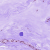

In [31]:
dataset['train'][0]['image']

## image -> tensor

In [32]:
class ImageDataset(Dataset):
    def __init__(self,pil_dataset,transform):
        self.transform = transform

        self.pil_dataset = pil_dataset['train']
   
    def __len__(self):
        return len(self.pil_dataset)
    
    def __getitem__(self,idx):
        item = self.pil_dataset[idx]
        image = item['image']
        label = item['label']

        image_tensor = self.transform(image)
        label_tensor = torch.tensor(label)

        return image_tensor,label_tensor
    
    def __repr__(self):
        return self.pil_dataset.__repr__()
        


In [33]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),  # Convert image to a tensor.
        # Optionally, add normalization if needed, e.g.,
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

dataset = ImageDataset(dataset,transform)


train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    dataset, [train_size, val_size, test_size]
)

In [41]:
train_dataset[0][0].mean(axis=-1)

tensor([[0.6563, 0.6813, 0.6678, 0.6762, 0.6227, 0.6235, 0.6166, 0.6122, 0.6045,
         0.6461, 0.6664, 0.6827, 0.6819, 0.7045, 0.7043, 0.6875, 0.6783, 0.6968,
         0.6867, 0.6981, 0.7131, 0.6967, 0.7048, 0.7013, 0.7208, 0.7224, 0.7035,
         0.7216, 0.7303, 0.7344, 0.7180, 0.7051, 0.7208, 0.7209, 0.7262, 0.7191,
         0.7137, 0.7154, 0.7090, 0.7075, 0.7190, 0.7141, 0.7160, 0.7118, 0.7235,
         0.7267, 0.7242, 0.7384, 0.7379, 0.7239],
        [0.5096, 0.5418, 0.5282, 0.5427, 0.4674, 0.4667, 0.4544, 0.4451, 0.4365,
         0.4980, 0.5186, 0.5466, 0.5437, 0.5676, 0.5701, 0.5457, 0.5318, 0.5592,
         0.5445, 0.5615, 0.5826, 0.5655, 0.5734, 0.5633, 0.5963, 0.5936, 0.5696,
         0.5958, 0.6060, 0.6122, 0.5878, 0.5722, 0.5911, 0.5936, 0.5989, 0.5882,
         0.5824, 0.5842, 0.5758, 0.5725, 0.5917, 0.5839, 0.5900, 0.5799, 0.6013,
         0.6035, 0.6012, 0.6205, 0.6170, 0.5960],
        [0.6907, 0.7251, 0.7153, 0.7176, 0.6593, 0.6608, 0.6554, 0.6473, 0.6368,
         


# algos to apply
- classification (binary) - svm logistic reg
- algos and why